In [115]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

import keras
import pathlib

In [14]:
dataset_url = "http://cybertron.cg.tu-berlin.de/eitz/projects/classifysketch/sketches_png.zip"
data_dir = tf.keras.utils.get_file("png.zip", origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

550098987/550098987 ━━━━━━━━━━━━━━━━━━━━ 38s 0us/step


In [16]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

20000


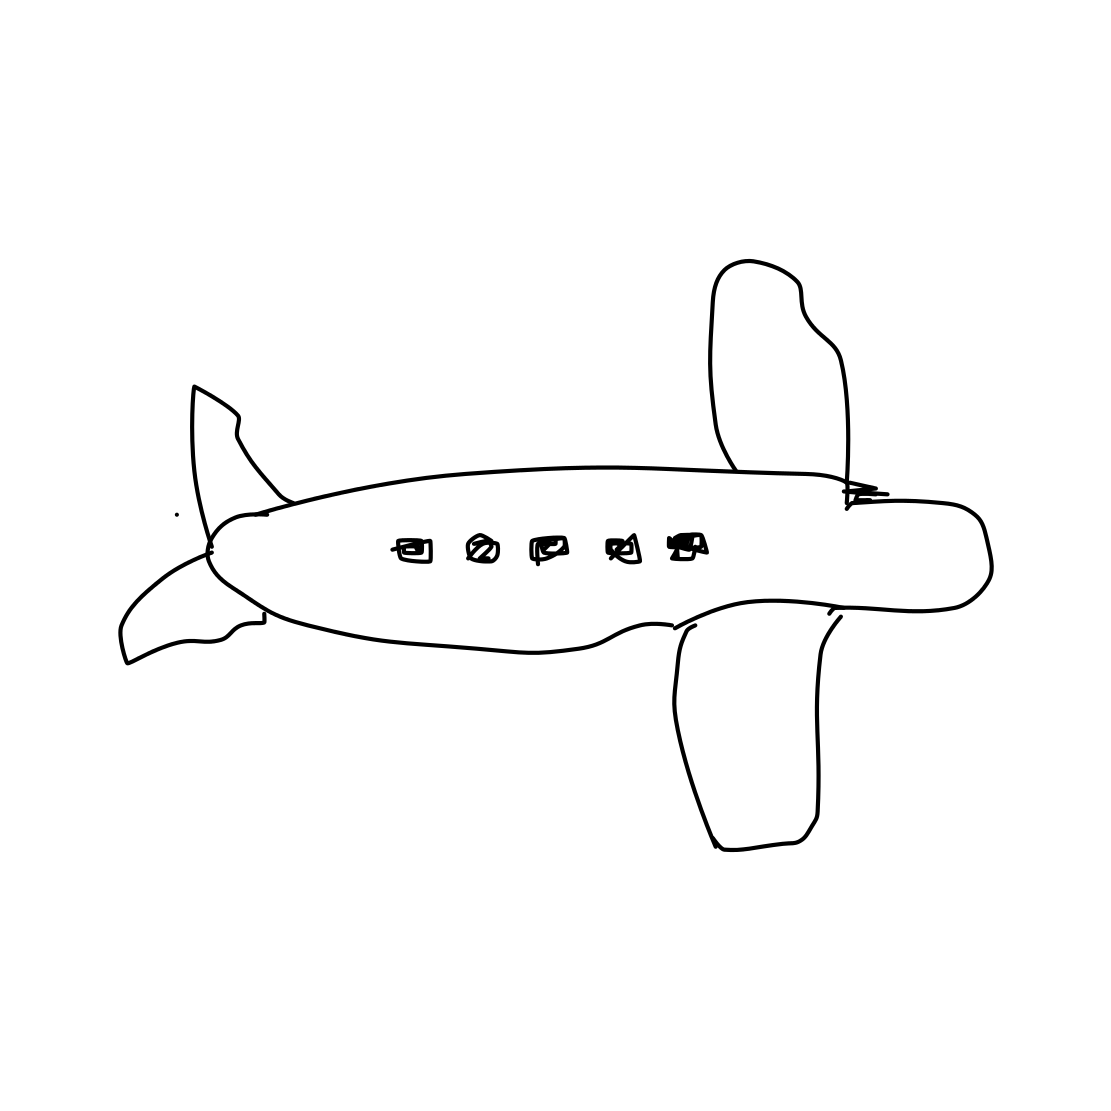

In [38]:
airplanes = list(data_dir.glob('airplane/*'))
PIL.Image.open(str(airplanes[3]))

# Load data using a Keras utility

<h5> Create a dataset</h5>

In [86]:
batch_size = 32

It's good practice to use a validation split when developing your model. We will use 80% of the images for training and 20% for validation.

In [81]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  batch_size=batch_size,
  color_mode='grayscale'
  )

Found 20000 files belonging to 250 classes.
Using 16000 files for training.


In [82]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  batch_size=batch_size,
  color_mode='grayscale'
  )

Found 20000 files belonging to 250 classes.
Using 4000 files for validation.


In [83]:
class_names = train_ds.class_names
print(class_names)

['airplane', 'alarm clock', 'angel', 'ant', 'apple', 'arm', 'armchair', 'ashtray', 'axe', 'backpack', 'banana', 'barn', 'baseball bat', 'basket', 'bathtub', 'bear (animal)', 'bed', 'bee', 'beer-mug', 'bell', 'bench', 'bicycle', 'binoculars', 'blimp', 'book', 'bookshelf', 'boomerang', 'bottle opener', 'bowl', 'brain', 'bread', 'bridge', 'bulldozer', 'bus', 'bush', 'butterfly', 'cabinet', 'cactus', 'cake', 'calculator', 'camel', 'camera', 'candle', 'cannon', 'canoe', 'car (sedan)', 'carrot', 'castle', 'cat', 'cell phone', 'chair', 'chandelier', 'church', 'cigarette', 'cloud', 'comb', 'computer monitor', 'computer-mouse', 'couch', 'cow', 'crab', 'crane (machine)', 'crocodile', 'crown', 'cup', 'diamond', 'dog', 'dolphin', 'donut', 'door', 'door handle', 'dragon', 'duck', 'ear', 'elephant', 'envelope', 'eye', 'eyeglasses', 'face', 'fan', 'feather', 'fire hydrant', 'fish', 'flashlight', 'floor lamp', 'flower with stem', 'flying bird', 'flying saucer', 'foot', 'fork', 'frog', 'frying-pan', 'g

<h5>Visualize the data</h5>

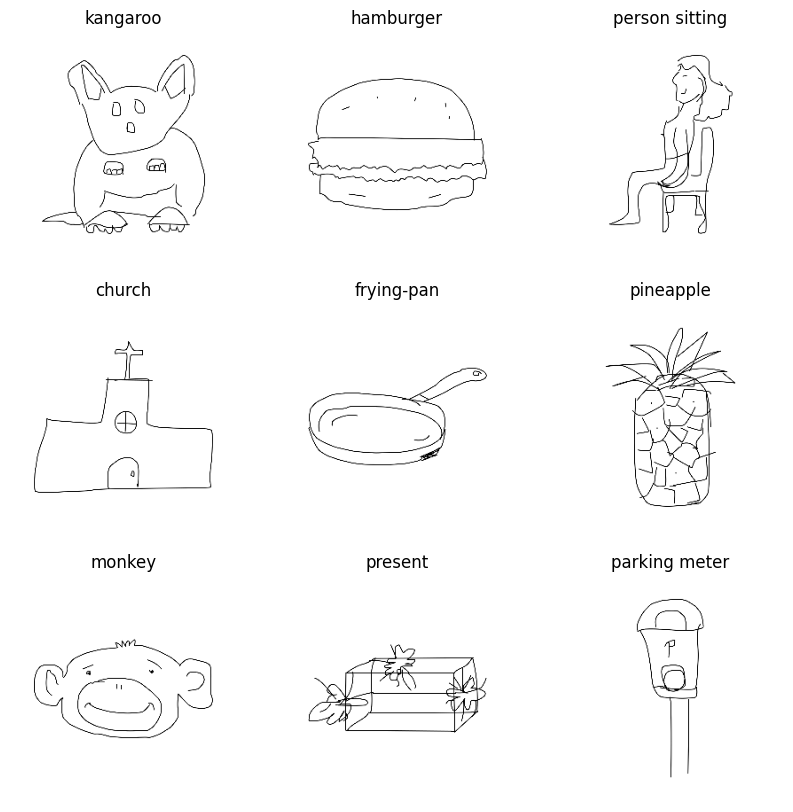

In [84]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [99]:
imgs, _ = train_ds.take(1).as_numpy_iterator().next()
imgs[0]

array([[[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       ...,

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]]], dtype=float32)

### Standardize the data
The channel values are in the [0, 255] range. This is not ideal for a neural network, so we will standardize values to be in the [0, 1] range by using <code>tf.keras.layers.Rescaling</code>. We will include the normalization layer inside our model definition later.

### Configure the dataset for performance

* <code>Dataset.cache</code> keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training model.
* <code>Dataset.prefetch</code> overlaps data preprocessing and model execution while training.


In [100]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Train a model

In [110]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [111]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [112]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 198s 392ms/step - accuracy: 0.0191 - loss: 5.3481 - val_accuracy: 0.1402 - val_loss: 4.2460
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 187s 374ms/step - accuracy: 0.1918 - loss: 3.8496 - val_accuracy: 0.2243 - val_loss: 3.7011
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 189s 378ms/step - accuracy: 0.3526 - loss: 2.8420 - val_accuracy: 0.2442 - val_loss: 3.8313
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 190s 381ms/step - accuracy: 0.5073 - loss: 2.0753 - val_accuracy: 0.2323 - val_loss: 4.6424
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 195s 391ms/step - accuracy: 0.6353 - loss: 1.4263 - val_accuracy: 0.2077 - val_loss: 6.1016
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 196s 392ms/step - accuracy: 0.7388 - loss: 0.9638 - val_accuracy: 0.2010 - val_loss: 7.8136
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 179s 358ms/step - accuracy: 0.8202 - loss: 0.6320 - val_accuracy: 0.2065 - val_loss: 8.6842
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 369ms/step - accuracy: 0.8753 -

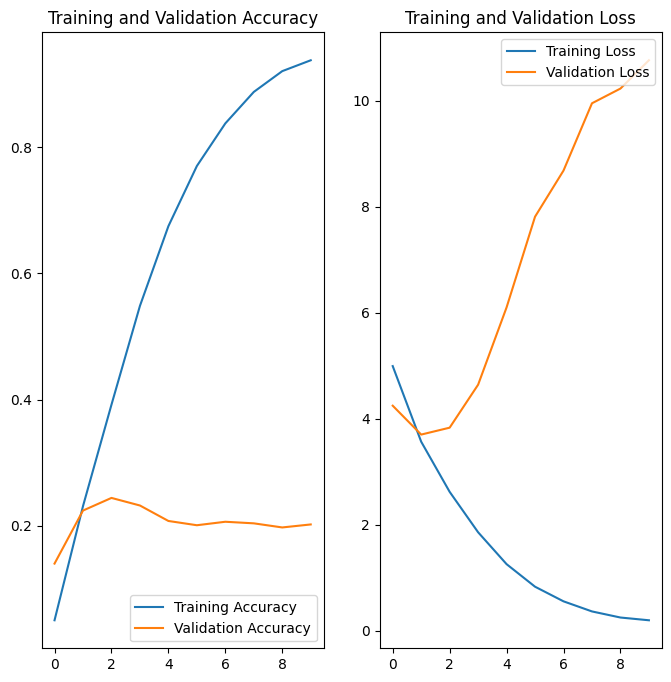

In [114]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Overfitting

There are multiple ways to fight overfitting in the training process. We will use <code>data augmentation</code> and add <code>dropout</code> to our model.

#### Data augmentation

In [117]:
img_width = 256
img_height = 256

data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)

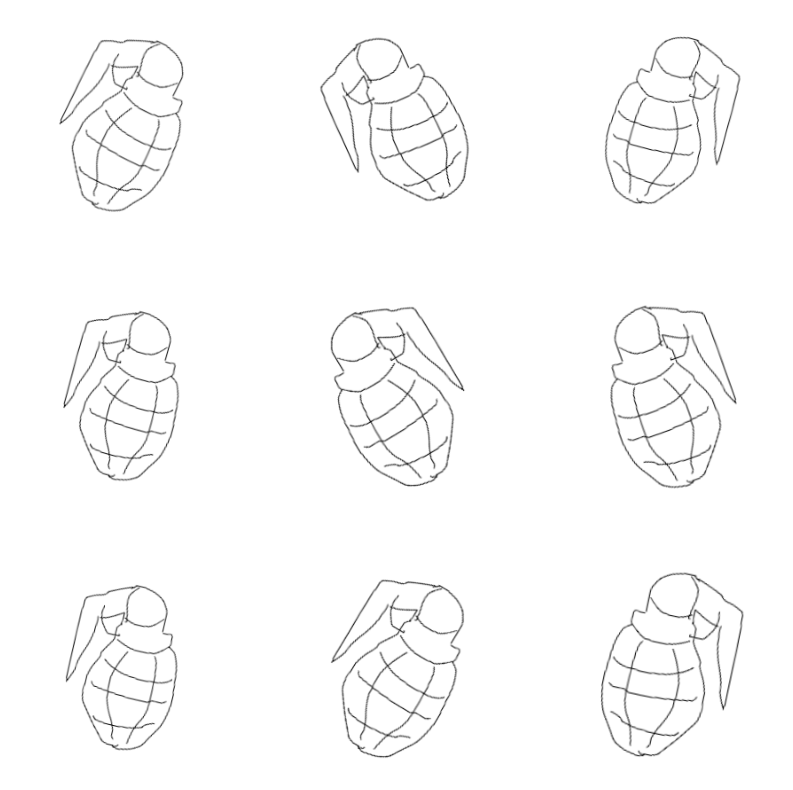

In [119]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"), cmap='gray')
    plt.axis("off")

#### Dropout
When we apply dropout to a layer, it randomly drops out a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, 0.2. This means dropping out 20% of the output units randomly from the applied layer.